<a href="https://colab.research.google.com/github/kevin-r-murphy/BA888-MBTA/blob/main/MBTA_Green_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [340]:
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [341]:
import pandas as pd
import numpy as np
trips = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/trips.txt')
shapes = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/shapes.txt')
stop_times = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/stop_times.txt')
stops = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/stops.txt')
route_patterns = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/route_patterns.txt')
route = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/routes.txt')
jan_headway = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/2024-01_Headway.csv')
feb_headway = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/2024-02_Headway.csv')
gated_entries = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/MBTA_Gated_Station_Entries.csv')
headways = pd.concat([jan_headway, feb_headway])

<ipython-input-341-1523b102d7d4>:3: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-341-1523b102d7d4>:5: DtypeWarning:

Columns (0,3,5) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-341-1523b102d7d4>:9: DtypeWarning:

Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-341-1523b102d7d4>:10: DtypeWarning:

Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.



In [342]:
trips = trips[trips['route_id'] == 'Green-C']
stop_times = stop_times[stop_times['trip_id'].isin(trips['trip_id'])]
headways = headways[headways['trip_id'].isin(trips['trip_id'])]

In [343]:
shapes.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,010128,42.329848,-71.083876,10001,NaN
1,010128,42.329788,-71.083268,10002,NaN
2,010128,42.330089,-71.083198,10003,NaN
3,010128,42.330296,-71.083161,10004,NaN
4,010128,42.330493,-71.083112,10005,NaN


In [344]:
stop_times[stop_times['trip_id'] == 59428098] #Can't Convert arrival and departure into date time because hours are greater than 23

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,timepoint,checkpoint_id,continuous_pickup,continuous_drop_off


In [345]:
stop_times['stop_id'] = stop_times['stop_id'].astype(str)
stops['stop_id'] = stops['stop_id'].astype(str)
stop_times = stop_times.merge(stops, how = 'left', on = 'stop_id')

In [346]:
trips['route_id'] = trips['route_id'].astype(str)
trips['trip_id'] = trips['trip_id'].astype(str)
stop_times['trip_id'] = stop_times['trip_id'].astype(str)
trips = trips.merge(route[['route_id','route_desc', 'route_type']], how = 'left', on = 'route_id')

In [347]:
stop_times = stop_times.merge(trips[['trip_id','route_desc', 'route_type', 'route_id']], how = 'left', on = 'trip_id')

**Gate Entries & Headways**

In [348]:
headways.shape

(107322, 14)

****Headway Analysis****

In [349]:
stop_times_RT = stop_times.merge(headways[['service_date','stop_departure_datetime', 'stop_departure_sec', 'headway_trunk_seconds','trip_id','stop_id', 'direction_id']], on = ['trip_id', 'stop_id'], how = 'left')
stop_times_RT['headway_mins'] = stop_times_RT['headway_trunk_seconds'] / 60
stop_times_RT.dropna(subset = ['headway_mins'],inplace = True)
stop_times_RT.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,timepoint,checkpoint_id,...,vehicle_type,route_desc,route_type,route_id,service_date,stop_departure_datetime,stop_departure_sec,headway_trunk_seconds,direction_id,headway_mins
49,59952528,06:03:00,06:03:00,70197,70,NaN,0,0,0,pktrm,...,0.0,Rapid Transit,0,Green-C,2024-02-04,2024-02-04T06:08:17Z,22097.0,155.0,0.0,2.583333
50,59952528,06:05:00,06:05:00,70159,90,NaN,0,0,0,boyls,...,0.0,Rapid Transit,0,Green-C,2024-02-04,2024-02-04T06:09:38Z,22178.0,152.0,0.0,2.533333
51,59952528,06:07:00,06:07:00,70157,100,NaN,0,0,0,armnl,...,0.0,Rapid Transit,0,Green-C,2024-02-04,2024-02-04T06:11:46Z,22306.0,140.0,0.0,2.333333
52,59952528,06:09:00,06:09:00,70155,110,NaN,0,0,0,coecl,...,0.0,Rapid Transit,0,Green-C,2024-02-04,2024-02-04T06:14:02Z,22442.0,181.0,0.0,3.016667
53,59952528,06:12:00,06:12:00,70153,120,NaN,0,0,0,hymnl,...,0.0,Rapid Transit,0,Green-C,2024-02-04,2024-02-04T06:16:56Z,22616.0,386.0,0.0,6.433333


In [350]:
print(stop_times_RT.shape)
print(stop_times.shape)
print(headways.shape)

(60183, 39)
(33214, 33)
(107322, 14)


Text(0.5, 0, 'Route')

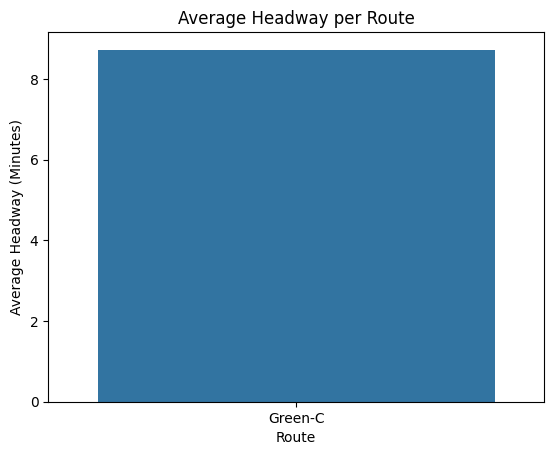

In [351]:
sns.barplot(stop_times_RT['headway_mins'].groupby(stop_times_RT['route_id']).mean())
plt.title('Average Headway per Route')
plt.ylabel('Average Headway (Minutes)')
plt.xlabel('Route')

Text(0.5, 0, 'Route')

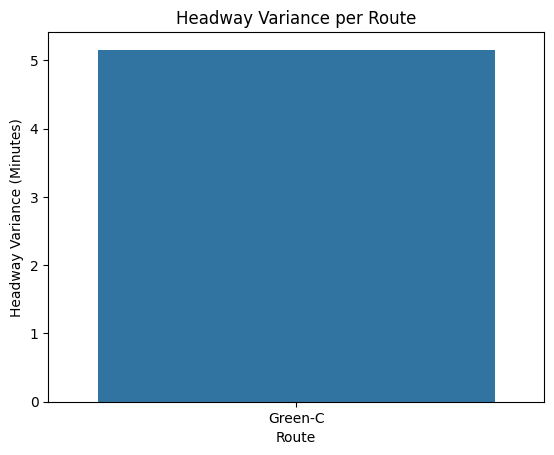

In [352]:
sns.barplot(stop_times_RT['headway_mins'].groupby(stop_times_RT['route_id']).std())
plt.title('Headway Variance per Route')
plt.ylabel('Headway Variance (Minutes)')
plt.xlabel('Route')

In [353]:
avg_station_headway = stop_times_RT.groupby(stop_times_RT['stop_id'])[['headway_mins', 'direction_id']].agg(['mean','min', 'max', 'std']).reset_index()
avg_station_headway.columns = ['_'.join(col).strip('_') for col in avg_station_headway.columns.values]
avg_station_headway['direction_id'] = avg_station_headway['direction_id_max'].astype(int).astype(str)

avg_station_headway.drop(['direction_id_max', 'direction_id_mean', 'direction_id_min', 'direction_id_std'], axis = 1, inplace = True)
avg_station_headway_named = avg_station_headway.merge(stops[['stop_id','stop_name', 'stop_lat', 'stop_lon']], on = 'stop_id', how = 'left')
avg_station_headway_named['name_direction'] = avg_station_headway_named['stop_name'] + ' ' + avg_station_headway_named['direction_id']
avg_station_headway_named['direction'] = avg_station_headway_named['direction_id'].apply(lambda x: 'Inbound' if x=='1' else 'Outbound')
avg_station_headway_named.head()

,stop_id,headway_mins_mean,headway_mins_min,headway_mins_max,headway_mins_std,direction_id,stop_name,stop_lat,stop_lon,name_direction,direction
0,70150,3.703016,0.033333,11.766667,2.648626,1,Kenmore,42.348949,-71.095169,Kenmore 1,Inbound
1,70151,4.416549,0.016667,26.650000,3.367256,0,Kenmore,42.348949,-71.095169,Kenmore 0,Outbound
2,70152,3.690327,0.466667,30.700000,2.783412,1,Hynes Convention Center,42.347888,-71.087903,Hynes Convention Center 1,Inbound
3,70153,3.187354,0.250000,16.450000,2.621978,0,Hynes Convention Center,42.347888,-71.087903,Hynes Convention Center 0,Outbound
4,70154,2.673771,0.500000,11.083333,2.027353,1,Copley,42.349871,-71.078049,Copley 1,Inbound


In [354]:
stops.head()

,stop_id,stop_code,stop_name,stop_desc,platform_code,platform_name,stop_lat,stop_lon,zone_id,stop_address,stop_url,level_id,location_type,parent_station,wheelchair_boarding,municipality,on_street,at_street,vehicle_type
0,1,1.0,Washington St opp Ruggles St,NaN,NaN,NaN,42.330957,-71.082754,ExpressBus-Downtown,NaN,https://www.mbta.com/stops/1,NaN,0,NaN,1,Boston,Washington Street,Ruggles Street,3.0
1,10,10.0,Theo Glynn Way @ Newmarket Sq,NaN,NaN,NaN,42.330555,-71.068787,LocalBus,NaN,https://www.mbta.com/stops/10,NaN,0,NaN,1,Boston,Theodore Glynn Way,Newmarket Square,3.0
2,10000,10000.0,Tremont St opp Temple Pl,NaN,NaN,NaN,42.355692,-71.062911,LocalBus,NaN,https://www.mbta.com/stops/10000,NaN,0,NaN,1,Boston,Tremont Street,Temple Place,3.0
3,10003,10003.0,Albany St opp Randall St,NaN,NaN,NaN,42.331591,-71.076237,LocalBus,NaN,https://www.mbta.com/stops/10003,NaN,0,NaN,1,Boston,Albany Street,Randall Street,3.0
4,10005,10005.0,Albany St opp E Concord St,NaN,NaN,NaN,42.335017,-71.071280,LocalBus,NaN,https://www.mbta.com/stops/10005,NaN,0,NaN,1,Boston,Albany Street,NaN,3.0


In [355]:
avg_station_headway_named.head()

,stop_id,headway_mins_mean,headway_mins_min,headway_mins_max,headway_mins_std,direction_id,stop_name,stop_lat,stop_lon,name_direction,direction
0,70150,3.703016,0.033333,11.766667,2.648626,1,Kenmore,42.348949,-71.095169,Kenmore 1,Inbound
1,70151,4.416549,0.016667,26.650000,3.367256,0,Kenmore,42.348949,-71.095169,Kenmore 0,Outbound
2,70152,3.690327,0.466667,30.700000,2.783412,1,Hynes Convention Center,42.347888,-71.087903,Hynes Convention Center 1,Inbound
3,70153,3.187354,0.250000,16.450000,2.621978,0,Hynes Convention Center,42.347888,-71.087903,Hynes Convention Center 0,Outbound
4,70154,2.673771,0.500000,11.083333,2.027353,1,Copley,42.349871,-71.078049,Copley 1,Inbound


Text(0, 0.5, 'Station (1 = Inbound)')

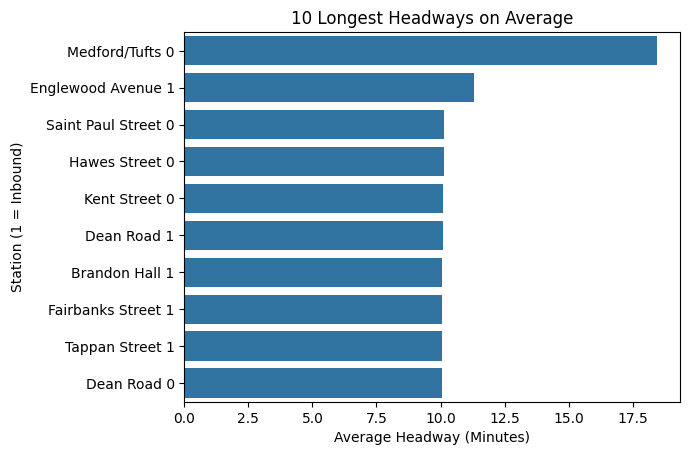

In [356]:
sns.barplot(data = avg_station_headway_named.sort_values(by = 'headway_mins_mean', ascending = False)[:10], y = 'name_direction', x = 'headway_mins_mean')
plt.title('10 Longest Headways on Average')
plt.xlabel('Average Headway (Minutes)')
plt.ylabel('Station (1 = Inbound)')

Text(0, 0.5, 'Station (1 = Inbound)')

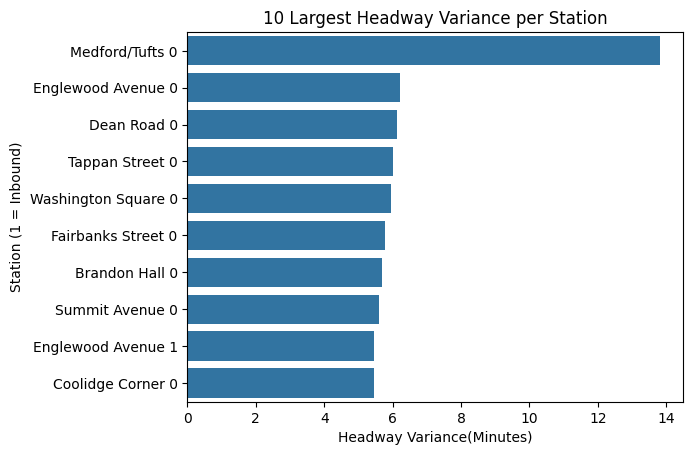

In [357]:
sns.barplot(data = avg_station_headway_named.sort_values(by = 'headway_mins_std', ascending = False)[:10], y = 'name_direction', x = 'headway_mins_std')
plt.title('10 Largest Headway Variance per Station')
plt.xlabel('Headway Variance(Minutes)')
plt.ylabel('Station (1 = Inbound)')

In [358]:
#Lat adjustment
avg_station_headway_named['stop_lat'] = np.where(avg_station_headway_named['direction_id'] == '1',
                                    avg_station_headway_named['stop_lat'] + 0.0005,
                                    avg_station_headway_named['stop_lat'] - 0.0005)

Direction_ID: 1 = Inbound, 0 = Outbound

In [359]:
import plotly.express as px
from plotly.offline import plot
px.set_mapbox_access_token('pk.eyJ1Ijoia2VtdTEiLCJhIjoiY2x5YWYzeDZtMTNwdzJybXhsMnhiOHFlcCJ9.ZlVG4dJl_SlRlFhYPmQdsw')
fig = px.scatter_mapbox(avg_station_headway_named, lat="stop_lat", lon="stop_lon",
                        color="direction", zoom=13,
                        size = 'headway_mins_mean',

                        #color_continuous_scale=px.colors.cyclical.Twilight,
                        #mapbox_style='open-street-map'
                        mapbox_style = 'basic',
                        title = 'Average Headway per Station',
                        labels = {'headway_mins_mean':'Average Headway (Minutes)',
                                  'direction': 'Direction'
                                  },
                        center = {'lat': 42.342507, 'lon': -71.118699},
                        width = 1000,
                        height = 800
                        )
fig.update_layout(
    title_x=0.5,
    title_y=0.9,
    title_font_size=24,
    legend_x = 0.05,
    legend_y = 0.95
)
fig.write_html('headway_mean_map.html')
fig.show()

In [360]:
fig = px.scatter_mapbox(avg_station_headway_named, lat="stop_lat", lon="stop_lon",
                        color="direction", zoom=13,
                        size = 'headway_mins_std',
                        #color_continuous_scale=px.colors.cyclical.Twilight,
                        #mapbox_style='open-street-map'
                        mapbox_style = 'basic',
                        title = 'Station Headway Variance',
                        labels = {'headway_mins_std':'Headway Variance (Minutes)',
                                  'direction': 'Direction'},
                        center = {'lat': 42.342507, 'lon': -71.118699},
                        width = 1000,
                        height = 800,
                        hover_data = ['direction_id', 'stop_name', 'stop_id']

                        )
fig.update_layout(
    title_x=0.5,
    title_y=0.9,
    title_font_size=24,
    legend_x = 0.05,
    legend_y = 0.95
)
fig.write_html('headway_std_map.html')
fig.show()

****Variance in Journey Length****

In [361]:
journey_length = stop_times_RT.sort_values(by = ['service_date', 'stop_sequence','trip_id'], ascending=[True, True, True])
journey_length['prev_sec'] = journey_length.groupby(['trip_id', 'service_date'])['stop_departure_sec'].shift(1)
journey_length['prev_station'] = journey_length.groupby(['trip_id', 'service_date'])['stop_name'].shift(1)
journey_length['prev_stop_seq'] = journey_length.groupby(['trip_id', 'service_date'])['stop_sequence'].shift(1)
journey_length['is_consecutive'] = journey_length.apply(lambda x: True if pd.isna(x['prev_stop_seq']) else  (((x['stop_sequence'] - x['prev_stop_seq']) ==1) or(x['stop_sequence'] - x['prev_stop_seq']) ==10), axis = 1)
journey_length['journey_length'] = (journey_length['stop_departure_sec'] - journey_length['prev_sec']) / 60
journey_length['journey_name'] = journey_length['prev_station'] + ' to ' + journey_length['stop_name']
journey_length = journey_length[journey_length['is_consecutive'] == True] #Only Consecutive Stations Toggle
journey_length_chart = journey_length.groupby('journey_name')['journey_length'].agg(['mean', 'std', 'count']).reset_index()
journey_length_chart = journey_length_chart[journey_length_chart['count'] > 100]

Text(0, 0.5, 'Event (Minimum 100 Events)')

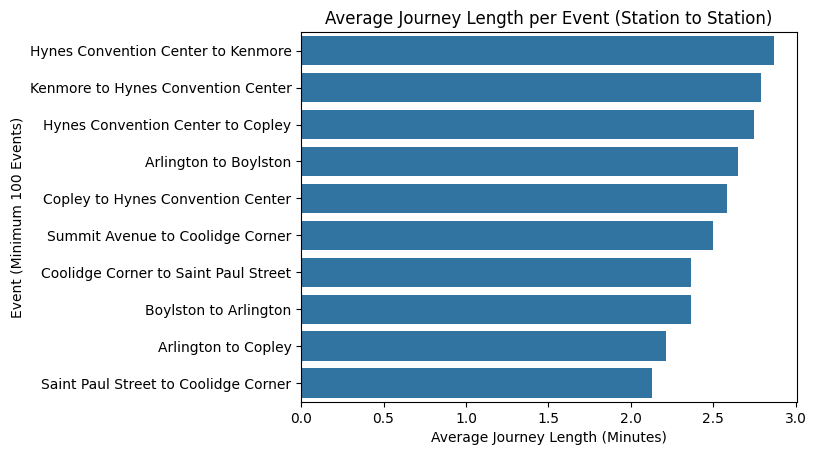

In [362]:
sns.barplot(data = journey_length_chart.sort_values(by = 'mean', ascending = False).head(10),y = 'journey_name', x = 'mean', orient = 'h')
plt.title('Average Journey Length per Event (Station to Station)')
plt.xlabel('Average Journey Length (Minutes)')
plt.ylabel('Event (Minimum 100 Events)')

Text(0, 0.5, 'Event (Minimum 100 Events)')

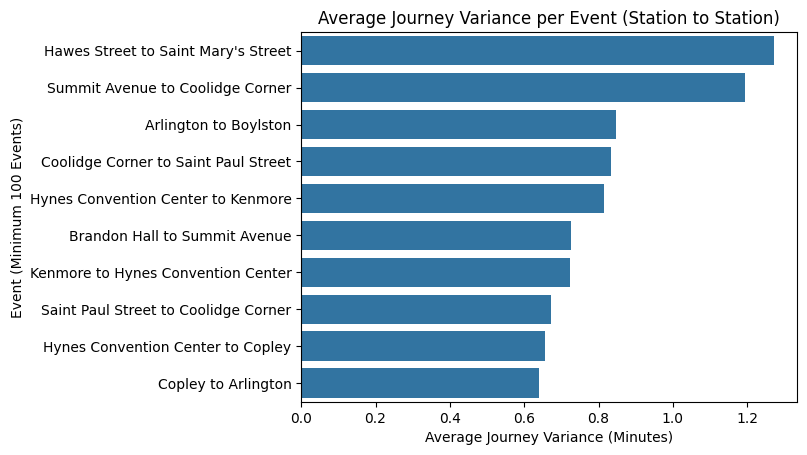

In [363]:
sns.barplot(data = journey_length_chart.sort_values(by = 'std', ascending = False).head(10),y = 'journey_name', x = 'std', orient = 'h')
plt.title('Average Journey Variance per Event (Station to Station)')
plt.xlabel('Average Journey Variance (Minutes)')
plt.ylabel('Event (Minimum 100 Events)')

In [364]:
journey_length[(journey_length['trip_id'] == '59736517') & (journey_length['service_date'] == '2024-01-03')]


,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,timepoint,checkpoint_id,...,stop_departure_sec,headway_trunk_seconds,direction_id,headway_mins,prev_sec,prev_station,prev_stop_seq,is_consecutive,journey_length,journey_name


In [365]:
headways[(headways['trip_id'] == '59736517') & (headways['service_date'] == '2024-01-03')]

,service_date,route_id,trunk_route_id,branch_route_id,trip_id,direction_id,direction,parent_station,stop_id,stop_name,stop_departure_datetime,stop_departure_sec,headway_trunk_seconds,headway_branch_seconds


**Gated Entries**

In [366]:
gated_entries.shape

(344060, 7)

In [367]:
print(gated_entries.head())

             service_date time_period      stop_id     station_name  \
0  2024/02/29 05:00:00+00  (00:00:00)  place-welln       Wellington   
1  2024/02/29 05:00:00+00  (00:00:00)  place-wimnl      Wood Island   
2  2024/02/29 05:00:00+00  (00:30:00)   place-sull  Sullivan Square   
3  2024/02/29 05:00:00+00  (00:00:00)  place-wondl       Wonderland   
4  2024/02/29 05:00:00+00  (00:00:00)  place-asmnl          Ashmont   

  route_or_line  gated_entries  ObjectId  
0   Orange Line            2.0    275252  
1     Blue Line            5.0    275262  
2   Orange Line            2.0    275265  
3     Blue Line           12.0    275266  
4      Red Line            6.0    275271  


In [368]:
gated_entries['ObjectId'].value_counts()

,count
ObjectId,
275252,1
504826,1
504824,1
504823,1
504822,1
...,...
390131,1
390130,1
390129,1


In [369]:
gated_entries['service_date'] = pd.to_datetime(gated_entries['service_date'])
gated_entries['hour'] = gated_entries['time_period'].str.extract(r'\((\d+):').astype(int)
gated_entries['date'] = gated_entries['service_date'].dt.date
print(gated_entries.isnull().sum())

service_date         0
time_period          0
stop_id          11725
station_name         0
route_or_line        0
gated_entries        0
ObjectId             0
hour                 0
date                 0
dtype: int64


In [370]:
gated_entries.dropna(inplace=True)
entries_per_hour = gated_entries.groupby(['station_name', 'hour']).size().reset_index(name='entries')
print(entries_per_hour.head())

  station_name  hour  entries
0      Airport     0      239
1      Airport     1      192
2      Airport     2       12
3      Airport     3        9
4      Airport     4      105


In [371]:
peak_hours = entries_per_hour.groupby('hour')['entries'].sum().reset_index()
high_traffic_stations = entries_per_hour.groupby('station_name')['entries'].sum().reset_index().sort_values(by='entries', ascending=False)

<ipython-input-372-015d481f2e0e>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




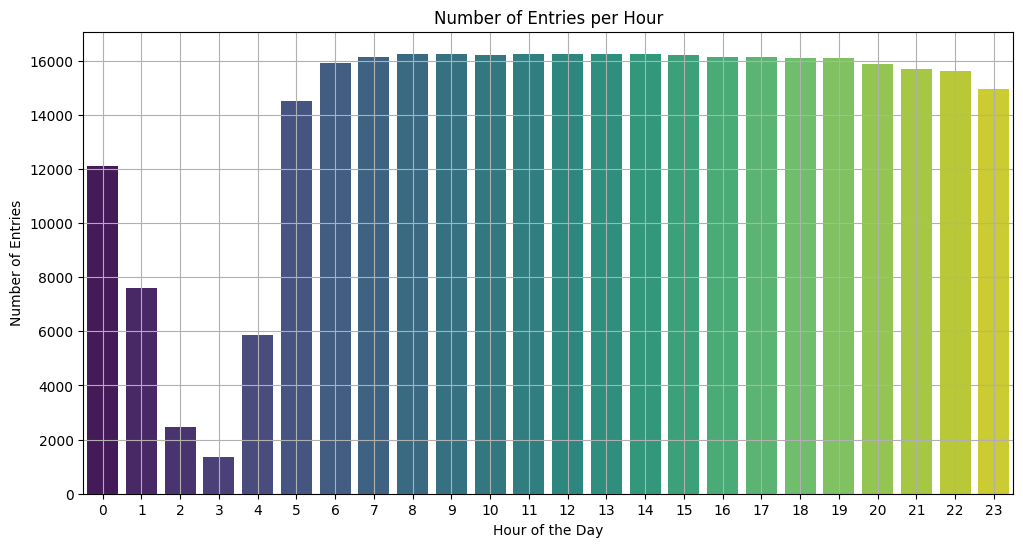

In [372]:
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='entries', data=peak_hours, palette='viridis')
plt.title('Number of Entries per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Entries')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

<ipython-input-373-e5f52d3fe76c>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




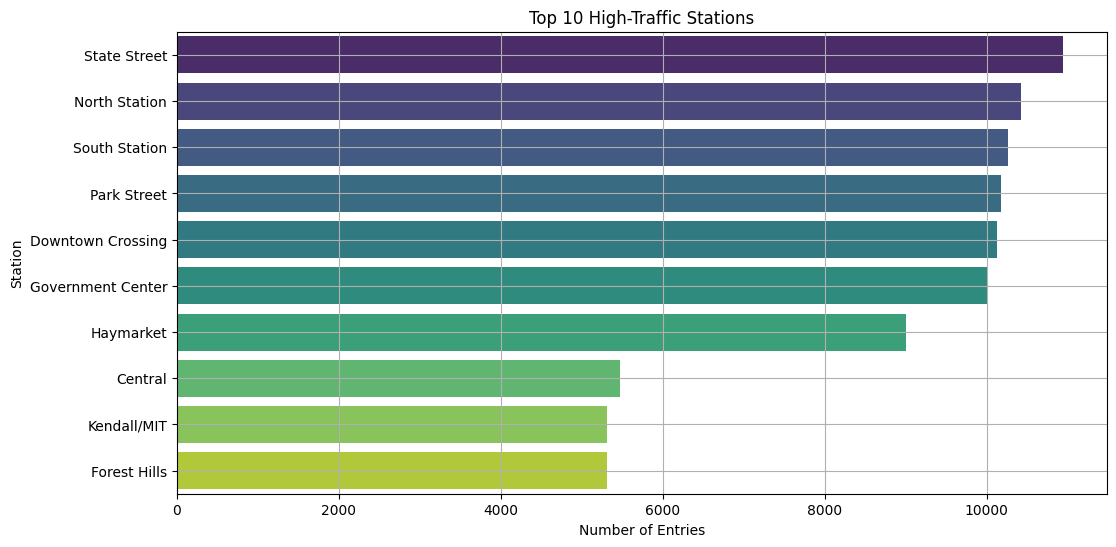

In [373]:
plt.figure(figsize=(12, 6))
sns.barplot(x='entries', y='station_name', data=high_traffic_stations.head(10), palette='viridis')
plt.title('Top 10 High-Traffic Stations')
plt.xlabel('Number of Entries')
plt.ylabel('Station')
plt.grid(True)
plt.show()

****Gated Entries & Headways Combined****

In [374]:
gated_entries['service_date'] = gated_entries['service_date'].astype(str)
gated_entries['service_date'] = gated_entries['service_date'].astype(str)
gated_entries['date_round'] = gated_entries['service_date'].apply(lambda x: x.split(' ')[0])

In [375]:
stop_times_RT['service_date'] = stop_times_RT['stop_departure_datetime'].apply(lambda x: x.split('T')[0])
stop_times_RT['service_time'] = stop_times_RT['stop_departure_datetime'].apply(lambda x: x.split('T')[1].replace('Z',''))
stop_times_RT['service_time'] = pd.to_datetime(stop_times_RT['service_time'], format = "%H:%M:%S")
stop_times_RT['round_time'] = stop_times_RT['service_time'].apply(lambda x: (x-dt.timedelta(minutes=x.minute%15, seconds=x.second, microseconds=x.microsecond)).time())
stop_times_RT['time_period'] = ('(' + stop_times_RT['round_time'].astype(str) + ')')


In [376]:
gated_entries['date'] = gated_entries['service_date'].astype(str)
gated_entries['time_period'] = gated_entries['time_period'].astype(str)
stop_times_RT['time_period'] = stop_times_RT['time_period'].astype(str)
stop_times_RT['service_date'] = stop_times_RT['service_date'].astype(str)
headway_gated = stop_times_RT.merge(gated_entries[['date_round', 'time_period','station_name', 'gated_entries']], left_on = ['service_date', 'time_period', 'stop_name'],right_on =['date_round', 'time_period', 'station_name'],  how = 'inner')
headway_gated

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,timepoint,checkpoint_id,...,stop_departure_sec,headway_trunk_seconds,direction_id,headway_mins,service_time,round_time,time_period,date_round,station_name,gated_entries
0,59952528,06:03:00,06:03:00,70197,70,NaN,0,0,0,pktrm,...,22097.0,155.0,0.0,2.583333,1900-01-01 06:08:17,06:00:00,(06:00:00),2024-02-04,Park Street,15.08
1,59952528,06:03:00,06:03:00,70197,70,NaN,0,0,0,pktrm,...,22097.0,155.0,0.0,2.583333,1900-01-01 06:08:17,06:00:00,(06:00:00),2024-02-04,Park Street,10.92
2,59952528,06:05:00,06:05:00,70159,90,NaN,0,0,0,boyls,...,22178.0,152.0,0.0,2.533333,1900-01-01 06:09:38,06:00:00,(06:00:00),2024-02-04,Boylston,9.00
3,59952553,06:22:00,06:22:00,70158,590,NaN,0,0,0,boyls,...,22486.0,127.0,1.0,2.116667,1900-01-01 06:14:46,06:00:00,(06:00:00),2024-02-04,Boylston,9.00
4,59952528,06:07:00,06:07:00,70157,100,NaN,0,0,0,armnl,...,22306.0,140.0,0.0,2.333333,1900-01-01 06:11:46,06:00:00,(06:00:00),2024-02-04,Arlington,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6984,60571335-BabckBackBayGovtGovtCtrKenmoreCDGovtC...,20:04:00,20:04:00,70151,130,NaN,0,1,0,kencl,...,72083.0,354.0,0.0,5.900000,1900-01-01 20:01:23,20:00:00,(20:00:00),2024-01-20,Kenmore,4.00
6985,60571335-BabckBackBayGovtGovtCtrKenmoreCDGovtC...,20:04:00,20:04:00,70151,130,NaN,0,1,0,kencl,...,72126.0,780.0,0.0,13.000000,1900-01-01 20:02:06,20:00:00,(20:00:00),2024-01-27,Kenmore,6.00
6986,60571336-BabckBackBayGovtGovtCtrKenmoreCDGovtC...,20:15:00,20:15:00,70151,130,NaN,0,1,0,kencl,...,72701.0,439.0,0.0,7.316667,1900-01-01 20:11:41,20:00:00,(20:00:00),2024-01-27,Kenmore,6.00
6987,60571336-BabckBackBayGovtGovtCtrKenmoreCDGovtC...,20:15:00,20:15:00,70151,130,NaN,0,1,0,kencl,...,73314.0,527.0,0.0,8.783333,1900-01-01 20:21:54,20:15:00,(20:15:00),2024-01-20,Kenmore,1.00


In [377]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
headway_gated['eval_metric'] = scaler.fit_transform(headway_gated[['gated_entries']]) * scaler.fit_transform(headway_gated[['headway_mins']])

In [378]:
headway_gated[['trip_id','stop_id','date_round', 'round_time', 'stop_name','direction_id', 'route_id', 'headway_mins', 'gated_entries', 'eval_metric']].sort_values(by = 'eval_metric', ascending = False).head(15)

,trip_id,stop_id,date_round,round_time,stop_name,direction_id,route_id,headway_mins,gated_entries,eval_metric
6875,60571305,70153,2024-02-10,15:30:00,Hynes Convention Center,0.0,Green-C,16.450000,296.00,0.304868
6435,60571267,70154,2024-02-10,17:30:00,Copley,1.0,Green-C,9.066667,401.00,0.227451
6196,60571255,70154,2024-02-10,15:30:00,Copley,1.0,Green-C,7.483333,479.00,0.224159
6285,60571260,70154,2024-02-03,16:30:00,Copley,1.0,Green-C,7.100000,450.00,0.199776
2901,60564447,70197,2024-02-08,17:30:00,Park Street,0.0,Green-C,9.066667,348.58,0.197718
2849,60564444,70197,2024-02-07,17:00:00,Park Street,0.0,Green-C,6.300000,469.22,0.184782
3094,60564447,70153,2024-02-02,18:00:00,Hynes Convention Center,0.0,Green-C,12.866667,221.00,0.177988
2820,60564337,70154,2024-02-05,17:00:00,Copley,1.0,Green-C,6.333333,435.00,0.172215
2451,60564322,70154,2024-02-09,14:30:00,Copley,1.0,Green-C,9.533333,283.00,0.168797
2814,60564337,70152,2024-02-05,17:00:00,Hynes Convention Center,1.0,Green-C,9.483333,276.00,0.163757


In [379]:
demand_per_direction = headway_gated.groupby('direction_id')['gated_entries'].sum().reset_index()
demand_per_direction.columns = ['Direction', 'Total Gated Entries']
print(demand_per_direction)

   Direction  Total Gated Entries
0        0.0        324366.833333
1        1.0        283316.000000


<ipython-input-380-247a51fd839b>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




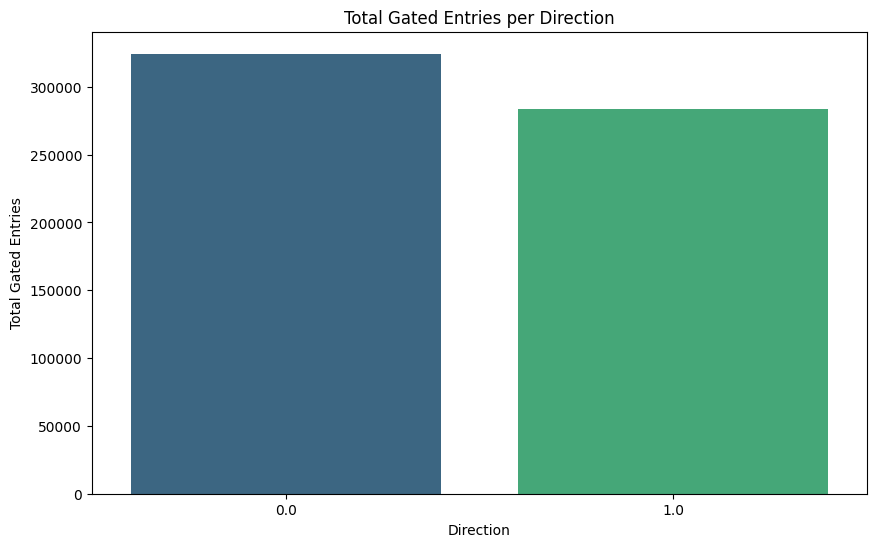

In [380]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=demand_per_direction, x='Direction', y='Total Gated Entries', palette='viridis')
plt.title('Total Gated Entries per Direction')
plt.xlabel('Direction')
plt.ylabel('Total Gated Entries')
plt.show()

****Green-C Analysis****

In [381]:
trips.head()

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,trip_route_type,route_pattern_id,bikes_allowed,route_desc,route_type
0,Green-C,LRV12024-hlb14011-Weekday-55,60564105,Cleveland Circle,NaN,0,B800-15,8000006,1,NaN,Green-C-832-0,2,Rapid Transit,0
1,Green-C,LRV12024-hlb14011-Weekday-55,60564108,Cleveland Circle,NaN,0,B800-16,8000006,1,NaN,Green-C-832-0,2,Rapid Transit,0
2,Green-C,LRV12024-hlb14011-Weekday-55,60564109,Cleveland Circle,NaN,0,B800-16,8000006,1,NaN,Green-C-832-0,2,Rapid Transit,0
3,Green-C,LRV12024-hlb14011-Weekday-55,60564114,Cleveland Circle,NaN,0,B800-18,8000006,1,NaN,Green-C-832-0,2,Rapid Transit,0
4,Green-C,LRV12024-hlb14011-Weekday-55,60564115,Cleveland Circle,NaN,0,B800-20,8000006,1,NaN,Green-C-832-0,2,Rapid Transit,0


In [382]:
trips_green_c = trips[trips['route_id'] == 'Green-C']
trips_green_c.head()

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,trip_route_type,route_pattern_id,bikes_allowed,route_desc,route_type
0,Green-C,LRV12024-hlb14011-Weekday-55,60564105,Cleveland Circle,NaN,0,B800-15,8000006,1,NaN,Green-C-832-0,2,Rapid Transit,0
1,Green-C,LRV12024-hlb14011-Weekday-55,60564108,Cleveland Circle,NaN,0,B800-16,8000006,1,NaN,Green-C-832-0,2,Rapid Transit,0
2,Green-C,LRV12024-hlb14011-Weekday-55,60564109,Cleveland Circle,NaN,0,B800-16,8000006,1,NaN,Green-C-832-0,2,Rapid Transit,0
3,Green-C,LRV12024-hlb14011-Weekday-55,60564114,Cleveland Circle,NaN,0,B800-18,8000006,1,NaN,Green-C-832-0,2,Rapid Transit,0
4,Green-C,LRV12024-hlb14011-Weekday-55,60564115,Cleveland Circle,NaN,0,B800-20,8000006,1,NaN,Green-C-832-0,2,Rapid Transit,0


In [383]:
stop_times_green_c = stop_times_RT[stop_times_RT['trip_id'].isin(trips_green_c['trip_id'])]
stop_times_green_c.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,timepoint,checkpoint_id,...,route_id,service_date,stop_departure_datetime,stop_departure_sec,headway_trunk_seconds,direction_id,headway_mins,service_time,round_time,time_period
49,59952528,06:03:00,06:03:00,70197,70,NaN,0,0,0,pktrm,...,Green-C,2024-02-04,2024-02-04T06:08:17Z,22097.0,155.0,0.0,2.583333,1900-01-01 06:08:17,06:00:00,(06:00:00)
50,59952528,06:05:00,06:05:00,70159,90,NaN,0,0,0,boyls,...,Green-C,2024-02-04,2024-02-04T06:09:38Z,22178.0,152.0,0.0,2.533333,1900-01-01 06:09:38,06:00:00,(06:00:00)
51,59952528,06:07:00,06:07:00,70157,100,NaN,0,0,0,armnl,...,Green-C,2024-02-04,2024-02-04T06:11:46Z,22306.0,140.0,0.0,2.333333,1900-01-01 06:11:46,06:00:00,(06:00:00)
52,59952528,06:09:00,06:09:00,70155,110,NaN,0,0,0,coecl,...,Green-C,2024-02-04,2024-02-04T06:14:02Z,22442.0,181.0,0.0,3.016667,1900-01-01 06:14:02,06:00:00,(06:00:00)
53,59952528,06:12:00,06:12:00,70153,120,NaN,0,0,0,hymnl,...,Green-C,2024-02-04,2024-02-04T06:16:56Z,22616.0,386.0,0.0,6.433333,1900-01-01 06:16:56,06:15:00,(06:15:00)


In [384]:
fig = px.scatter_mapbox(avg_station_headway_named[avg_station_headway_named['stop_id'].isin(stop_times_green_c['stop_id'])], lat="stop_lat", lon="stop_lon",
                        color="direction", zoom=12,
                        size = 'headway_mins_std',
                        #color_continuous_scale=px.colors.cyclical.Twilight,
                        #mapbox_style='open-street-map'
                        mapbox_style = 'basic',
                        title = 'Green-C Station Headway Variance',
                        labels = {'headway_mins_std':'Headway Variance (Minutes)',
                                  'direction': 'Direction'},
                        center = {'lat': 42.366196, 'lon': -71.099637},
                        width = 1000,
                        height = 800,
                        hover_data = ['direction_id', 'stop_name', 'stop_id']

                        )
fig.update_layout(
    title_x=0.5,
    title_y=0.9,
    title_font_size=24,
    legend_x = 0.05,
    legend_y = 0.95
)
fig.write_html('headway_std_map.html')
fig.show()

In [385]:
stop_times_green_c_sched = stop_times[stop_times['trip_id'].isin(trips_green_c['trip_id'])]
stop_times_green_c_sched = stop_times_green_c_sched.merge(trips[['trip_id','direction_id']], how = 'left', on = 'trip_id')
stop_times_green_c_sched = stop_times_green_c_sched.sort_values(by = ['trip_id', 'departure_time'])[['route_id','trip_id', 'stop_id', 'stop_name', 'direction_id', 'departure_time']]
stop_times_green_c_sched['prev_stop'] = stop_times_green_c_sched.groupby('trip_id')['stop_name'].shift(1)
stop_times_green_c_sched[stop_times_green_c_sched['prev_stop'].isna()]['stop_name'].value_counts()

,count
stop_name,
Cleveland Circle,1033
Kenmore,688
Government Center,342
Medford/Tufts,9
North Station,6


In [386]:
#70202 Government Center
#70238 Clevland Circle
stop_times_green_c_sched = stop_times_green_c_sched[stop_times_green_c_sched['prev_stop'].isna()][['route_id','trip_id','stop_id', 'stop_name', 'departure_time', 'direction_id']]
stop_times_green_c_sched.sort_values(by = ['direction_id', 'departure_time'], inplace = True)
stop_times_green_c_sched['departure_time'] = stop_times_green_c_sched['departure_time'].apply(lambda x: x if int(x.split(':')[0]) < 24 else str(int(x.split(':')[0])-24).zfill(2) + ':' + x.split(':')[1] + ':00')
stop_times_green_c_sched = stop_times_green_c_sched[~stop_times_green_c_sched['trip_id'].isin(['canonical-Green-C-C1-0', 'canonical-Green-C-C1-1'])]
stop_times_green_c_sched['time_diff'] = (pd.to_datetime(stop_times_green_c_sched['departure_time'], format="%H:%M:%S") - pd.to_datetime(stop_times_green_c_sched.groupby(['stop_name','direction_id'])['departure_time'].shift(1),format = "%H:%M:%S")).dt.seconds/60
stop_times_green_c_sched.dropna(inplace = True)
stop_times_green_c_sched.groupby(['direction_id', 'stop_name'])['time_diff'].agg(['mean', 'std', 'min', 'max', 'count']).reset_index()

,direction_id,stop_name,mean,std,min,max,count
0,0,Government Center,3.447059,2.647449,0.0,14.0,340
1,0,Kenmore,1.705968,2.522957,0.0,14.0,687
2,0,Medford/Tufts,3.375000,6.300510,0.0,15.0,8
3,1,Cleveland Circle,1.133851,2.251112,0.0,11.0,1031
4,1,North Station,5.400000,7.797435,0.0,17.0,5


In [387]:
stop_times_green_c.columns

Index(['trip_id', 'arrival_time', 'departure_time', 'stop_id', 'stop_sequence',
       'stop_headsign', 'pickup_type', 'drop_off_type', 'timepoint',
       'checkpoint_id', 'continuous_pickup', 'continuous_drop_off',
       'stop_code', 'stop_name', 'stop_desc', 'platform_code', 'platform_name',
       'stop_lat', 'stop_lon', 'zone_id', 'stop_address', 'stop_url',
       'level_id', 'location_type', 'parent_station', 'wheelchair_boarding',
       'municipality', 'on_street', 'at_street', 'vehicle_type', 'route_desc',
       'route_type', 'route_id', 'service_date', 'stop_departure_datetime',
       'stop_departure_sec', 'headway_trunk_seconds', 'direction_id',
       'headway_mins', 'service_time', 'round_time', 'time_period'],
      dtype='object')

In [388]:
stop_times_green_c = stop_times_green_c[['trip_id','stop_id','stop_name', 'direction_id','service_date', 'departure_time', 'service_time', 'headway_mins']]
stop_times_green_c['service_time'] = stop_times_green_c['service_time'].dt.time

In [389]:
stop_times_green_c.sort_values(by = ['trip_id','service_date', 'departure_time'], inplace = True)
stop_times_green_c['prev_stop'] = stop_times_green_c.groupby(['trip_id', 'service_date'])['stop_name'].shift(1)
stop_times_green_c.head()

,trip_id,stop_id,stop_name,direction_id,service_date,departure_time,service_time,headway_mins,prev_stop
49,59952528,70197,Park Street,0.0,2024-02-04,06:03:00,06:08:17,2.583333,NaN
50,59952528,70159,Boylston,0.0,2024-02-04,06:05:00,06:09:38,2.533333,Park Street
51,59952528,70157,Arlington,0.0,2024-02-04,06:07:00,06:11:46,2.333333,Boylston
52,59952528,70155,Copley,0.0,2024-02-04,06:09:00,06:14:02,3.016667,Arlington
53,59952528,70153,Hynes Convention Center,0.0,2024-02-04,06:12:00,06:16:56,6.433333,Copley


In [390]:

green_c_comp = stop_times_green_c[stop_times_green_c['stop_id'].isin(['70151','70234'])]
green_c_comp = green_c_comp[green_c_comp['service_time'] > pd.to_datetime('03:00:00').time()]
green_c_comp.sort_values(by = ['stop_name','service_date', 'service_time'], inplace = True)
green_c_comp['actual_time_diff'] = (pd.to_datetime(green_c_comp['service_time'], format="%H:%M:%S") - pd.to_datetime(green_c_comp.groupby(['stop_name','direction_id','service_date'])['service_time'].shift(1),format = "%H:%M:%S")).dt.seconds/60
green_c_comp_out = green_c_comp.groupby(['direction_id', 'stop_name'])['actual_time_diff'].agg(['mean', 'median','std', 'min', 'max', 'count']).reset_index()
green_c_comp_out = green_c_comp_out[green_c_comp_out['count'] > 100]
green_c_comp_out.head()

,direction_id,stop_name,mean,median,std,min,max,count
0,0.0,Kenmore,12.009311,10.533333,7.247095,0.716667,92.733333,2003
1,1.0,Dean Road,13.940699,11.200000,7.853083,1.750000,81.466667,1851


**Finding stops that create variance**

In [391]:
stop_times_green_c.sort_values(by = ['direction_id','stop_id','service_date', 'departure_time'], inplace = True)
stop_times_green_c['departure_time'] = stop_times_green_c['departure_time'].apply(lambda x: x if int(x.split(':')[0]) < 24 else str(int(x.split(':')[0])-24).zfill(2) + ':' + x.split(':')[1] + ':00')
stop_times_green_c['sched_diff'] = (pd.to_datetime(stop_times_green_c['departure_time'], format="%H:%M:%S") - pd.to_datetime(stop_times_green_c.groupby(['direction_id','stop_id','service_date'])['departure_time'].shift(1),format = "%H:%M:%S")).dt.seconds/60
stop_times_green_c.sort_values(by = ['direction_id','stop_id','service_date', 'service_time'], inplace = True)
stop_times_green_c['actual_diff'] = (pd.to_datetime(stop_times_green_c['service_time'], format="%H:%M:%S") - pd.to_datetime(stop_times_green_c.groupby(['direction_id','stop_id','service_date'])['service_time'].shift(1),format = "%H:%M:%S")).dt.seconds/60

stop_times_green_c.sort_values(by = ['trip_id', 'service_date', 'service_time'], inplace = True)
stop_num = 1
stop_nums = []
for index, row in stop_times_green_c.iterrows():
  if pd.isna(row['prev_stop']):
    stop_num = 1
  stop_nums.append(stop_num)
  stop_num += 1
stop_times_green_c['stop_num'] = stop_nums




stop_times_green_c.sort_values(by = ['direction_id','stop_id','service_date', 'departure_time'], inplace = True)
stop_times_green_c = stop_times_green_c[(stop_times_green_c['departure_time'] > '03:00:00') | (stop_times_green_c['service_time'] > pd.to_datetime('03:00:00').time())]
stop_times_green_c['direction_id'] = stop_times_green_c['direction_id'].apply(lambda x: 'Inbound' if x == 1 else 'Outbound')
stop_times_green_c.head()

<ipython-input-391-d2a9d479c4e0>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,trip_id,stop_id,stop_name,direction_id,service_date,departure_time,service_time,headway_mins,prev_stop,sched_diff,actual_diff,stop_num
10602,60564105-BabckBackBayGovtGovtCtrKenmoreCDGovtC...,70151,Kenmore,Outbound,2024-01-03,05:49:00,05:48:10,2.600000,NaN,NaN,NaN,1
11106,60564109-BabckBackBayGovtGovtCtrKenmoreCDGovtC...,70151,Kenmore,Outbound,2024-01-03,06:00:00,06:06:29,5.950000,NaN,11.0,18.316667,1
11742,60564114-BabckBackBayGovtGovtCtrKenmoreCDGovtC...,70151,Kenmore,Outbound,2024-01-03,06:14:00,06:10:15,3.766667,NaN,14.0,3.766667,1
11950,60564115-BabckBackBayGovtGovtCtrKenmoreCDGovtC...,70151,Kenmore,Outbound,2024-01-03,06:25:00,06:26:53,9.650000,NaN,11.0,16.633333,1
12306,60564117-BabckBackBayGovtGovtCtrKenmoreCDGovtC...,70151,Kenmore,Outbound,2024-01-03,06:36:00,06:42:46,4.650000,NaN,11.0,15.883333,1


In [392]:
stop_times_green_c.dropna(inplace = True)
stop_times_green_c = stop_times_green_c[(stop_times_green_c['sched_diff'] < 60) & (stop_times_green_c['actual_diff'] < 60)]
stop_times_green_c_out = stop_times_green_c.groupby(['direction_id','stop_id', 'stop_name'])[['sched_diff','actual_diff', 'headway_mins']].agg(['mean', 'median','std', 'min', 'max', 'count']).reset_index()
stop_times_green_c_out.columns = ['_'.join(col).strip('_') for col in stop_times_green_c_out.columns.values]
stop_times_green_c_out = stop_times_green_c_out[stop_times_green_c_out['actual_diff_count'] > 100]
stop_times_green_c_out = stop_times_green_c_out[~stop_times_green_c_out['stop_name'].isin(['Government Center', 'Hynes Convention Center', 'Copley','Arlington','Boylston', 'Park Street', 'Haymarket', 'North Station', 'Science Park/West End', 'Englewood Avenue', 'Lechmere', 'Gilman Square', 'Magoun Square', 'Ball Square', 'Medford/Tufts', 'East Somerville'])]
stop_times_green_c_out.head()

,direction_id,stop_id,stop_name,sched_diff_mean,sched_diff_median,sched_diff_std,sched_diff_min,sched_diff_max,sched_diff_count,actual_diff_mean,...,actual_diff_std,actual_diff_min,actual_diff_max,actual_diff_count,headway_mins_mean,headway_mins_median,headway_mins_std,headway_mins_min,headway_mins_max,headway_mins_count
0,Inbound,70150,Kenmore,14.628253,11.0,8.102207,0.0,57.0,807,14.735998,...,8.585153,1.100000,57.150000,807,3.705411,3.266667,2.624516,0.033333,11.766667,807
6,Inbound,70212,Saint Mary's Street,13.656543,10.0,7.137574,0.0,57.0,1811,13.760289,...,7.880326,0.366667,57.500000,1811,9.990521,9.900000,3.441653,0.366667,37.650000,1811
7,Inbound,70214,Hawes Street,13.724214,10.0,7.236165,0.0,57.0,1813,13.832910,...,7.883166,0.016667,59.916667,1813,10.011482,9.900000,3.402677,0.016667,25.450000,1813
8,Inbound,70216,Kent Street,13.735537,10.0,7.229238,0.0,57.0,1815,13.857163,...,7.888697,0.016667,59.816667,1815,10.016070,9.966667,3.263815,0.016667,25.383333,1815
9,Inbound,70218,Saint Paul Street,13.692771,10.0,7.198731,0.0,57.0,1826,13.803423,...,7.774506,1.350000,59.916667,1826,10.007357,9.983333,3.105943,1.350000,24.200000,1826


<ipython-input-393-5380e6e33655>:7: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-393-5380e6e33655>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0, 'Kenmore'),
 Text(1, 0, "Saint Mary's Street"),
 Text(2, 0, 'Hawes Street'),
 Text(3, 0, 'Kent Street'),
 Text(4, 0, 'Saint Paul Street'),
 Text(5, 0, 'Coolidge Corner'),
 Text(6, 0, 'Summit Avenue'),
 Text(7, 0, 'Brandon Hall'),
 Text(8, 0, 'Fairbanks Street'),
 Text(9, 0, 'Washington Square'),
 Text(10, 0, 'Tappan Street'),
 Text(11, 0, 'Dean Road')]

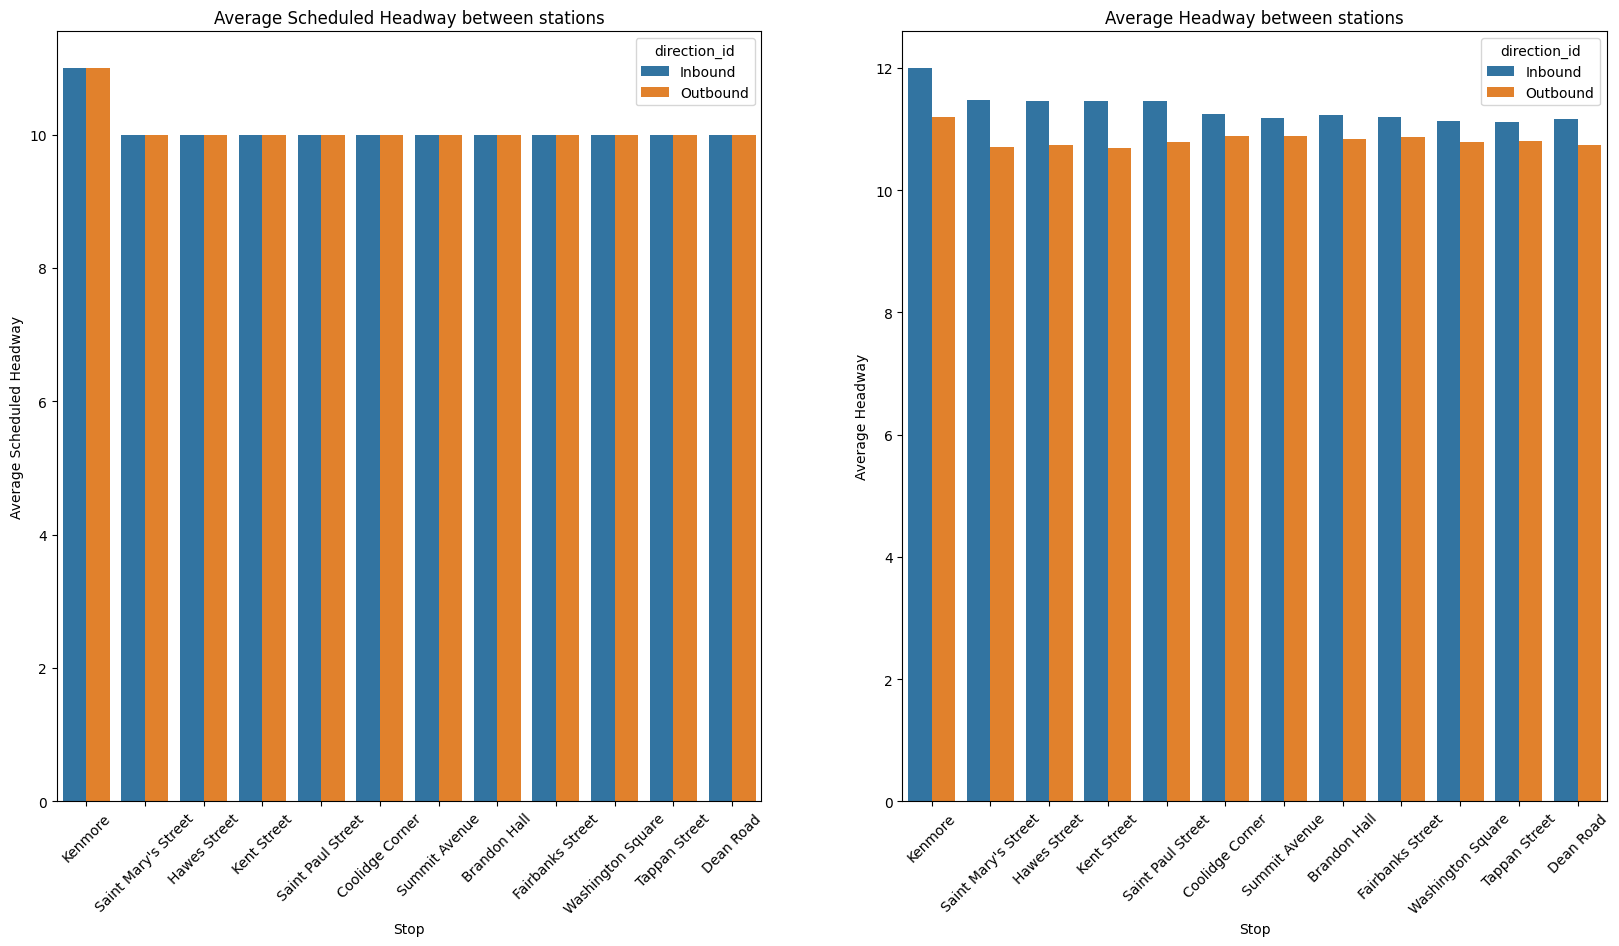

In [393]:
fig,axs = plt.subplots(ncols=2, figsize = (20,10))
sns.barplot(data = stop_times_green_c_out.sort_values(by = 'stop_id'),x = 'stop_name', y = 'sched_diff_median',hue = 'direction_id', ax=axs[0])
sns.barplot(data = stop_times_green_c_out.sort_values(by = 'stop_id'),x = 'stop_name', y = 'actual_diff_median',hue = 'direction_id', ax=axs[1])
axs[0].set_title('Average Scheduled Headway between stations')
axs[0].set_ylabel('Average Scheduled Headway')
axs[0].set_xlabel('Stop')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
axs[1].set_title('Average Headway between stations')
axs[1].set_ylabel('Average Headway')
axs[1].set_xlabel('Stop')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)


<ipython-input-394-777c430a501d>:7: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-394-777c430a501d>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0, 'Kenmore'),
 Text(1, 0, "Saint Mary's Street"),
 Text(2, 0, 'Hawes Street'),
 Text(3, 0, 'Kent Street'),
 Text(4, 0, 'Saint Paul Street'),
 Text(5, 0, 'Coolidge Corner'),
 Text(6, 0, 'Summit Avenue'),
 Text(7, 0, 'Brandon Hall'),
 Text(8, 0, 'Fairbanks Street'),
 Text(9, 0, 'Washington Square'),
 Text(10, 0, 'Tappan Street'),
 Text(11, 0, 'Dean Road')]

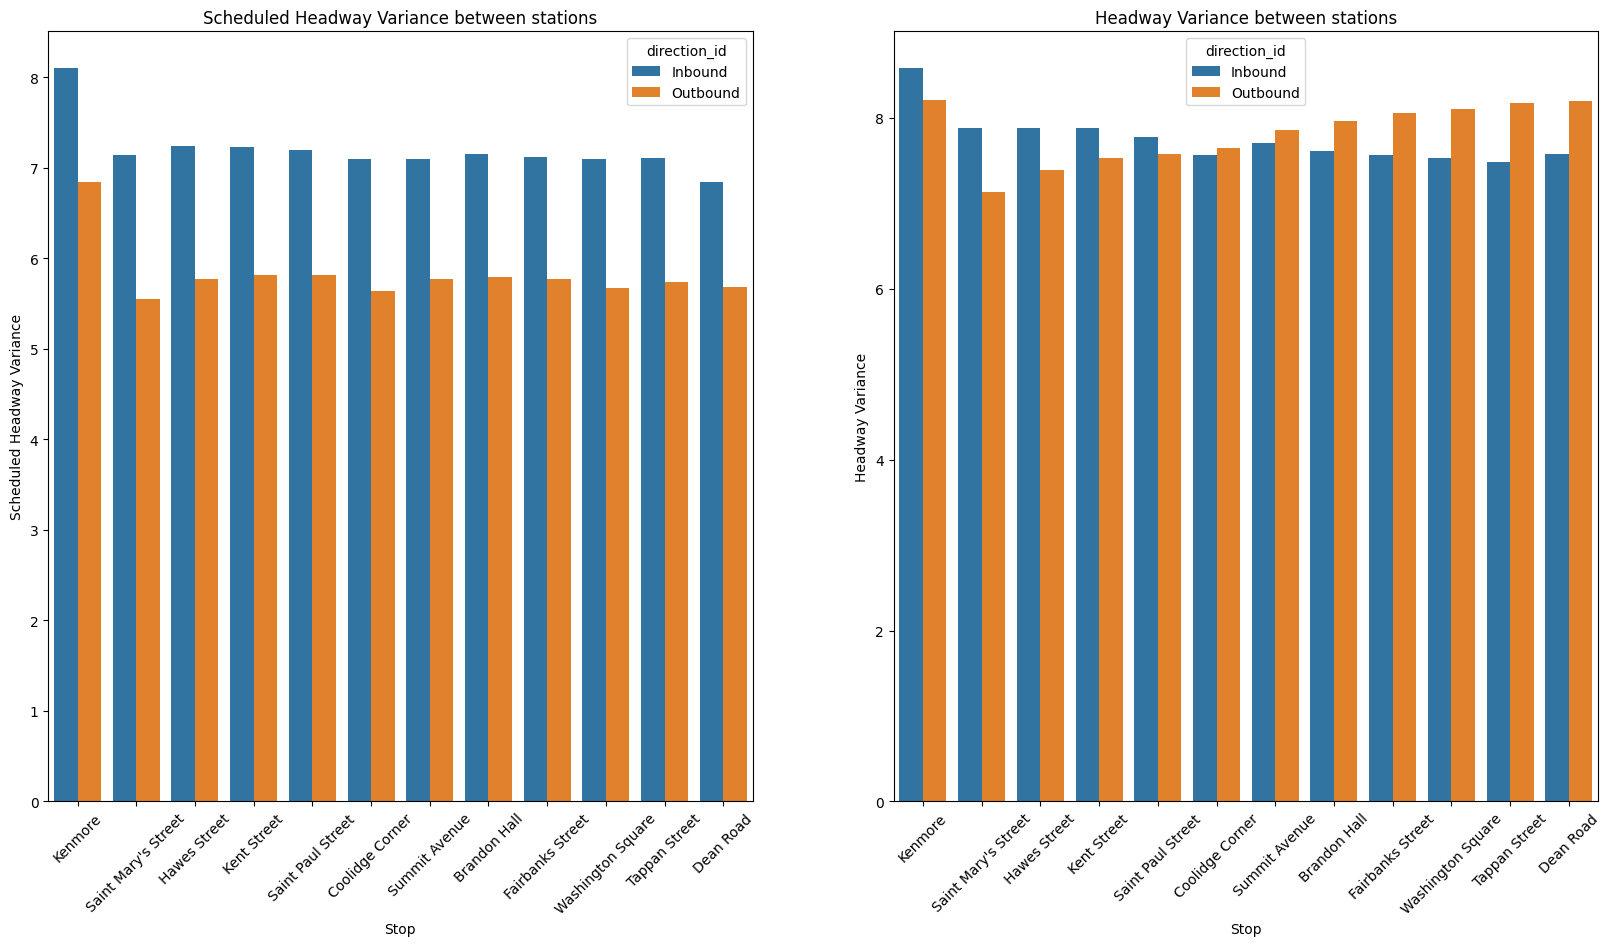

In [394]:
fig,axs = plt.subplots(ncols=2, figsize = (20,10))
sns.barplot(data = stop_times_green_c_out.sort_values(by = 'stop_id'),x = 'stop_name', y = 'sched_diff_std',hue = 'direction_id', ax=axs[0])
sns.barplot(data = stop_times_green_c_out.sort_values(by = 'stop_id'),x = 'stop_name', y = 'actual_diff_std',hue = 'direction_id', ax=axs[1])
axs[0].set_title('Scheduled Headway Variance between stations')
axs[0].set_ylabel('Scheduled Headway Variance')
axs[0].set_xlabel('Stop')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
axs[1].set_title('Headway Variance between stations')
axs[1].set_ylabel('Headway Variance')
axs[1].set_xlabel('Stop')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)

In [395]:
stop_times_green_c['hour'] = stop_times_green_c['departure_time'].apply(lambda x: pd.to_datetime(x).hour)
stop_times_green_c['is_weekend'] = stop_times_green_c['service_date'].apply(lambda x: 'Weekend' if pd.to_datetime(x).weekday() > 4 else 'Weekday')
stop_times_green_c['month'] = stop_times_green_c['service_date'].apply(lambda x: pd.to_datetime(x).month)
stop_times_green_c.head()

,trip_id,stop_id,stop_name,direction_id,service_date,departure_time,service_time,headway_mins,prev_stop,sched_diff,actual_diff,stop_num,hour,is_weekend,month
49264,60570862,70151,Kenmore,Outbound,2024-01-13,06:03:00,06:07:35,0.600000,Hynes Convention Center,14.0,9.200000,6,6,Weekend,1
49422,60570864,70151,Kenmore,Outbound,2024-01-13,06:16:00,06:21:48,0.950000,Hynes Convention Center,13.0,14.216667,6,6,Weekend,1
49527,60570865,70151,Kenmore,Outbound,2024-01-13,06:29:00,06:51:09,7.233333,Hynes Convention Center,13.0,29.350000,6,6,Weekend,1
49620,60570866,70151,Kenmore,Outbound,2024-01-13,06:42:00,06:54:01,1.216667,Hynes Convention Center,13.0,2.866667,6,6,Weekend,1
49848,60570869,70151,Kenmore,Outbound,2024-01-13,07:17:00,07:15:56,0.900000,Hynes Convention Center,35.0,21.916667,6,7,Weekend,1


In [396]:
hour_group = stop_times_green_c.groupby(['hour', 'direction_id'])[['actual_diff']].agg(['mean','median', 'std', 'count']).reset_index()
hour_group.columns = ['_'.join(col).strip('_') for col in hour_group.columns.values]
hour_group = hour_group[hour_group['hour'] > 5]
hour_group.head()

,hour,direction_id,actual_diff_mean,actual_diff_median,actual_diff_std,actual_diff_count
4,6,Inbound,17.497713,13.083333,10.526110,1035
5,6,Outbound,14.131864,13.166667,7.722855,1089
6,7,Inbound,14.012293,11.666667,7.305639,1227
7,7,Outbound,13.097757,11.883333,8.315089,1382
8,8,Inbound,14.688799,12.400000,7.249748,1363


Text(0, 0.5, 'Median Headway difference')

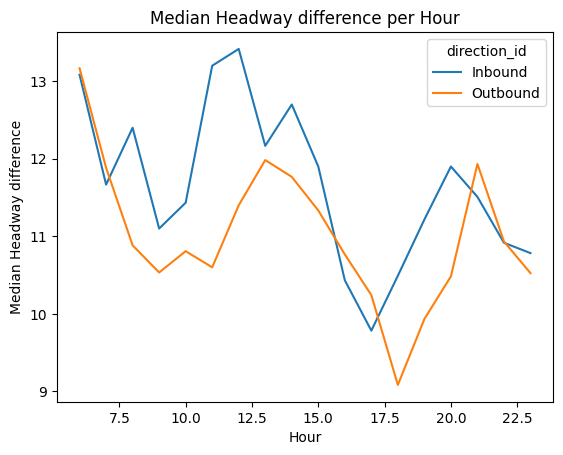

In [397]:
sns.lineplot(data = hour_group, x = 'hour', y = 'actual_diff_median', hue = 'direction_id')
plt.title('Median Headway difference per Hour')
plt.xlabel('Hour')
plt.ylabel('Median Headway difference')

Text(0, 0.5, 'Median Headway difference')

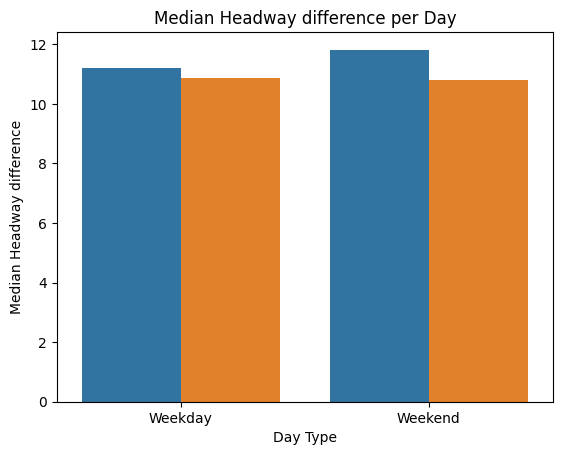

In [398]:
weekend_group = stop_times_green_c.groupby(['is_weekend', 'direction_id'])[['actual_diff']].agg(['mean','median', 'std', 'count']).reset_index()
weekend_group.columns = ['_'.join(col).strip('_') for col in weekend_group.columns.values]
sns.barplot(data = weekend_group, x = 'is_weekend', y = 'actual_diff_median', hue = 'direction_id', legend=False)
plt.title('Median Headway difference per Day')
plt.xlabel('Day Type')
plt.ylabel('Median Headway difference')

Text(0, 0.5, 'Median Headway difference')

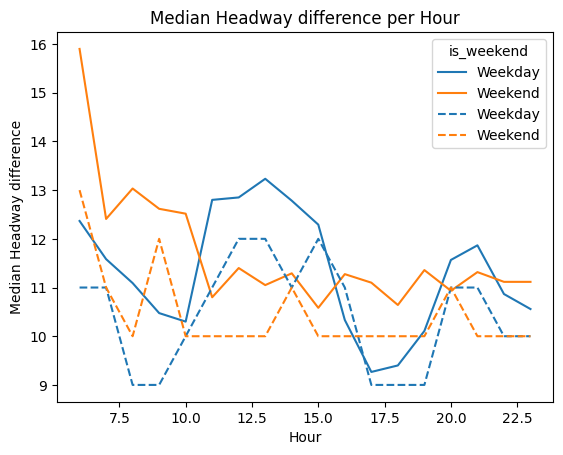

In [399]:
weekend_group = stop_times_green_c.groupby(['is_weekend','hour'])[['actual_diff']].agg(['mean','median', 'std', 'count']).reset_index()
weekend_group.columns = ['_'.join(col).strip('_') for col in weekend_group.columns.values]
weekend_group = weekend_group[weekend_group['hour'] > 5]
weekend_group_sched = stop_times_green_c.groupby(['is_weekend','hour'])[['sched_diff']].agg(['mean','median', 'std', 'count']).reset_index()
weekend_group_sched.columns = ['_'.join(col).strip('_') for col in weekend_group_sched.columns.values]
weekend_group_sched = weekend_group_sched[weekend_group_sched['hour'] > 5]
fig, ax = plt.subplots()
sns.lineplot(data = weekend_group,ax=ax, x = 'hour', y = 'actual_diff_median', hue =  'is_weekend')
sns.lineplot(data = weekend_group_sched,ax=ax, x = 'hour', y = 'sched_diff_median', hue =  'is_weekend', linestyle="dashed")
ax.set_title('Median Headway difference per Hour')
ax.set_xlabel('Hour')
ax.set_ylabel('Median Headway difference')



Text(0, 0.5, 'Average Number of Trains Per Hour')

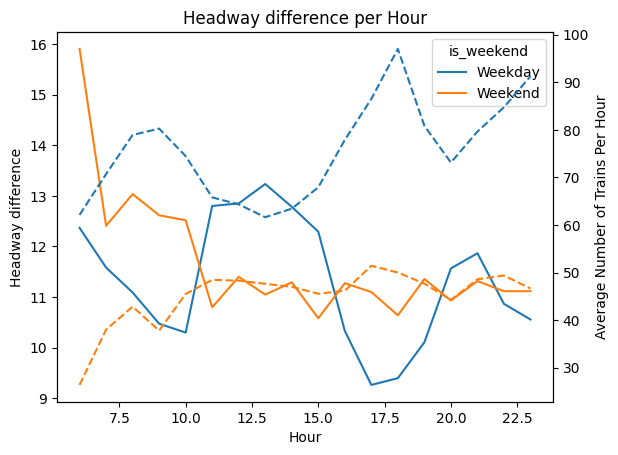

In [400]:
weekend_group['actual_diff_count'] = (weekend_group['actual_diff_count'] / stop_times_green_c['service_date'].nunique())

fig, ax = plt.subplots()
sns.lineplot(data = weekend_group, ax=ax, x = 'hour', y = 'actual_diff_median', hue =  'is_weekend')
ax2 = ax.twinx()
sns.lineplot(data = weekend_group, ax=ax2, x = 'hour', y = 'actual_diff_count', hue =  'is_weekend', linestyle="dashed", legend = False)
ax.set_title('Headway difference per Hour')
ax.set_xlabel('Hour')
ax.set_ylabel('Headway difference')
ax2.set_ylabel('Average Number of Trains Per Hour')

Text(0, 0.5, 'Average Number of Trains Per Hour')

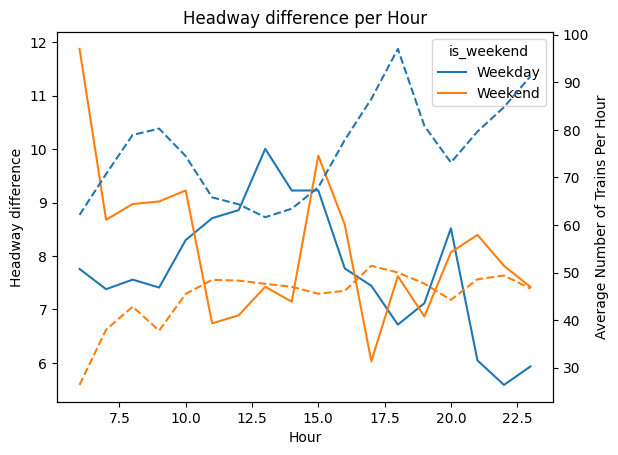

In [401]:
fig, ax = plt.subplots()
sns.lineplot(data = weekend_group, ax=ax, x = 'hour', y = 'actual_diff_std', hue =  'is_weekend')
ax2 = ax.twinx()
sns.lineplot(data = weekend_group, ax=ax2, x = 'hour', y = 'actual_diff_count', hue =  'is_weekend', linestyle="dashed", legend = False)
ax.set_title('Headway difference per Hour')
ax.set_xlabel('Hour')
ax.set_ylabel('Headway difference')
ax2.set_ylabel('Average Number of Trains Per Hour')

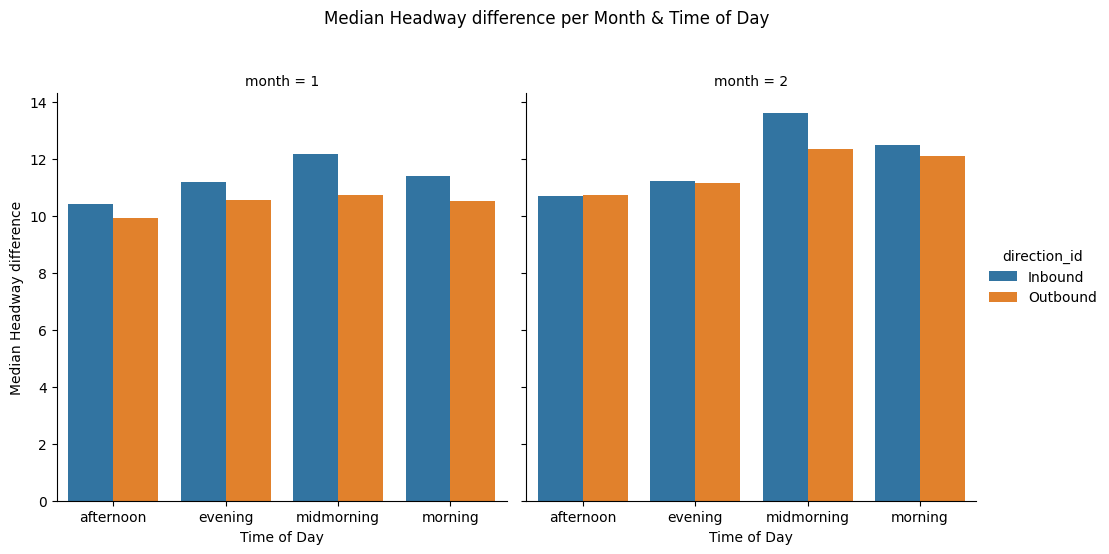

In [434]:
time_day = {
    'morning': (5,6,7,8,9,10),
    'midmorning' : (11,12,13,14),
    'afternoon': (15,16,17,18,19),
    'evening': (20,21,22,23,0),
}
stop_times_green_c['time_of_day'] = stop_times_green_c['hour'].apply(lambda x: [key for key, value in time_day.items() if x in value][0])
month_group = stop_times_green_c.groupby(['month', 'direction_id', 'time_of_day'])[['actual_diff']].agg(['mean','median', 'std', 'count']).reset_index()
month_group.columns = ['_'.join(col).strip('_') for col in month_group.columns.values]
g = sns.catplot(data = month_group, col = 'month', x = 'time_of_day', y = 'actual_diff_median', hue = 'direction_id', kind = 'bar')
g.fig.suptitle('Median Headway difference per Month & Time of Day', y = 1.1)
g.set_ylabels('Median Headway difference')
g.set_xlabels('Time of Day')

In [423]:
stop_times_green_c['hour'].value_counts()

,count
hour,
18,3528
17,3310
23,3309
22,3219
19,3084
21,3077
16,2977
8,2922
10,2879


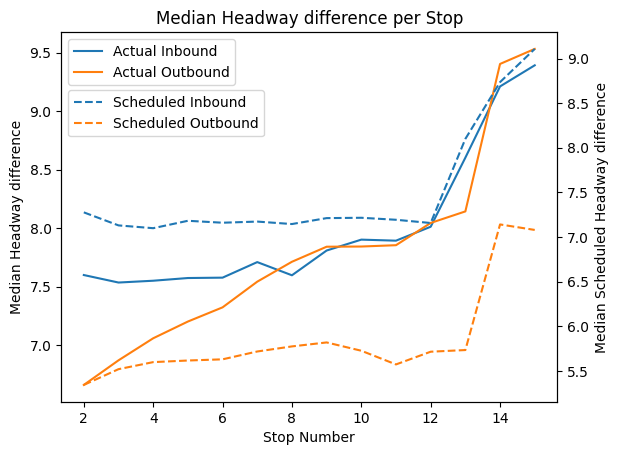

In [417]:
stop_num_group = stop_times_green_c.groupby(['stop_num', 'direction_id'])[['actual_diff']].agg(['mean','median', 'std', 'count']).reset_index()
stop_num_group.columns = ['_'.join(col).strip('_') for col in stop_num_group.columns.values]
stop_num_group = stop_num_group[stop_num_group['stop_num'] < 16]
stop_num_group['direction_id'] = stop_num_group['direction_id'].apply(lambda x: 'Actual ' + x)
stop_num_group_sched = stop_times_green_c.groupby(['stop_num', 'direction_id'])[['sched_diff']].agg(['mean','median', 'std', 'count']).reset_index()
stop_num_group_sched.columns = ['_'.join(col).strip('_') for col in stop_num_group_sched.columns.values]
stop_num_group_sched = stop_num_group_sched[stop_num_group_sched['stop_num'] < 16]
stop_num_group_sched['direction_id'] = stop_num_group_sched['direction_id'].apply(lambda x: 'Scheduled ' + x)
fig, ax = plt.subplots()
sns.lineplot(ax = ax, data = stop_num_group, x = 'stop_num', y = 'actual_diff_std', hue = 'direction_id')
ax2 = ax.twinx()
sns.lineplot(ax = ax2, data = stop_num_group_sched, x = 'stop_num', y = 'sched_diff_std', hue = 'direction_id', linestyle="dashed")
plt.title('Median Headway difference per Stop')
ax.set_xlabel('Stop Number')
ax.set_ylabel('Median Headway difference')
ax2.set_ylabel('Median Scheduled Headway difference')
ax.legend(loc='upper left')
ax2.legend(loc='center left', bbox_to_anchor=(0, 0.78))